In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("online retail.xlsx")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df=df[df["Quantity"] > 0]

creating new column called "Amount" is the product of Quantity and UnitPrice.

In [35]:
df.insert(6,"Amount",df['Quantity'] * df['UnitPrice'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


# 1.which customer has placed highest number of products?

<AxesSubplot:xlabel='CustomerID'>

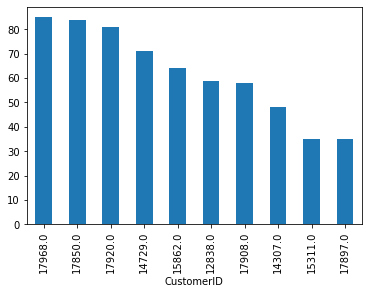

In [93]:
df.groupby("CustomerID")['InvoiceNo'].count().sort_values(ascending=False).head(10).plot(kind='bar')

# 2.Which customer has placed lowest number of orders?

<AxesSubplot:xlabel='CustomerID'>

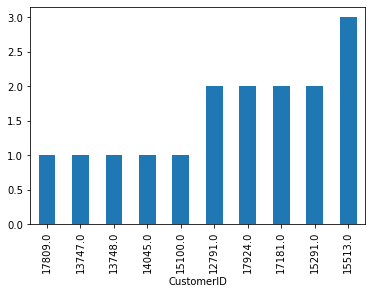

In [44]:
df.groupby("CustomerID")['InvoiceNo'].count().sort_values().head(10).plot(kind='bar')

# 3.which country  has placed lowest number of orders.?

<AxesSubplot:xlabel='Country'>

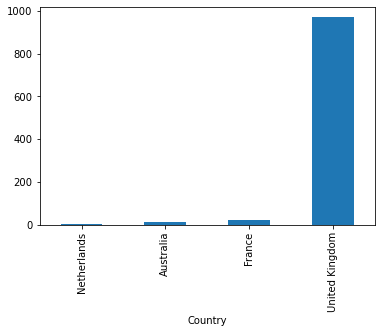

In [46]:
df.groupby("Country")['InvoiceNo'].count().sort_values().head(10).plot(kind='bar')

# 4.which customer has spend more money?

In [113]:
df.groupby(["CustomerID","InvoiceNo"],as_index=False)['Amount'].sum().sort_values(by="Amount",ascending=False).head()

,CustomerID,InvoiceNo,Amount
31,16029.0,536387,3193.92
33,16210.0,536477,2474.74
41,17511.0,536390,1825.74
8,13408.0,536394,1024.68
1,12583.0,536370,855.86


# 5.Which customer has spend more money on 1 particular product?

In [125]:
df.groupby(["CustomerID","Description"])['UnitPrice'].sum().sort_values(ascending=False)

CustomerID  Description                       
13705.0     RUSTIC  SEVENTEEN DRAWER SIDEBOARD    165.00
17850.0     IVORY EMBROIDERED QUILT                71.50
            SET 7 BABUSHKA NESTING BOXES           38.25
            WOOD S/3 CABINET ANT WHITE FINISH      27.80
            GLASS STAR FROSTED T-LIGHT HOLDER      21.25
                                                   ...  
13694.0     NAMASTE SWAGAT INCENSE                  0.24
14307.0     SLEEPING CAT ERASERS                    0.21
17908.0     PARTY TIME PENCIL ERASERS               0.21
            DISCO BALL CHRISTMAS DECORATION         0.12
17511.0     DISCO BALL CHRISTMAS DECORATION         0.10
Name: UnitPrice, Length: 885, dtype: float64

In [127]:
df[df["Description"]=="RUSTIC  SEVENTEEN DRAWER SIDEBOARD"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country
246,536392,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,1,2010-12-01 10:29:00,165.0,165.0,13705.0,United Kingdom


In [133]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
Amount                float64
CustomerID            float64
Country                object
dtype: object

In [134]:
df['month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount,CustomerID,Country,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,12


# how many orders in month?

In [135]:
df.groupby("month")["InvoiceNo"].count()

month
12    1006
Name: InvoiceNo, dtype: int64